In [5]:
import pandas as pd

# Load CSV file
df = pd.read_csv('D:/computer vision/Crop_details.csv')

# Check the first few rows
print(df.head())

# Check how many images per class
print(df['crop'].value_counts())

   Unnamed: 0                                               path       crop  \
0           0  /kaggle/input/kag2/sugarcane/sugarcane037ahs.jpeg  sugarcane   
1           1    /kaggle/input/kag2/sugarcane/sugarcane034a.jpeg  sugarcane   
2           2  /kaggle/input/kag2/sugarcane/sugarcane032arot....  sugarcane   
3           3  /kaggle/input/kag2/sugarcane/sugarcane036ahs.jpeg  sugarcane   
4           4  /kaggle/input/kag2/sugarcane/sugarcane023ahs.jpeg  sugarcane   

   croplabel  
0          3  
1          3  
2          3  
3          3  
4          3  
crop
wheat        203
sugarcane    199
jute         199
maize        199
rice         199
Name: count, dtype: int64


0     D:/computer_vision/kag2/sugarcane037ahs.jpeg
1       D:/computer_vision/kag2/sugarcane034a.jpeg
2    D:/computer_vision/kag2/sugarcane032arot.jpeg
3     D:/computer_vision/kag2/sugarcane036ahs.jpeg
4     D:/computer_vision/kag2/sugarcane023ahs.jpeg
Name: path, dtype: object


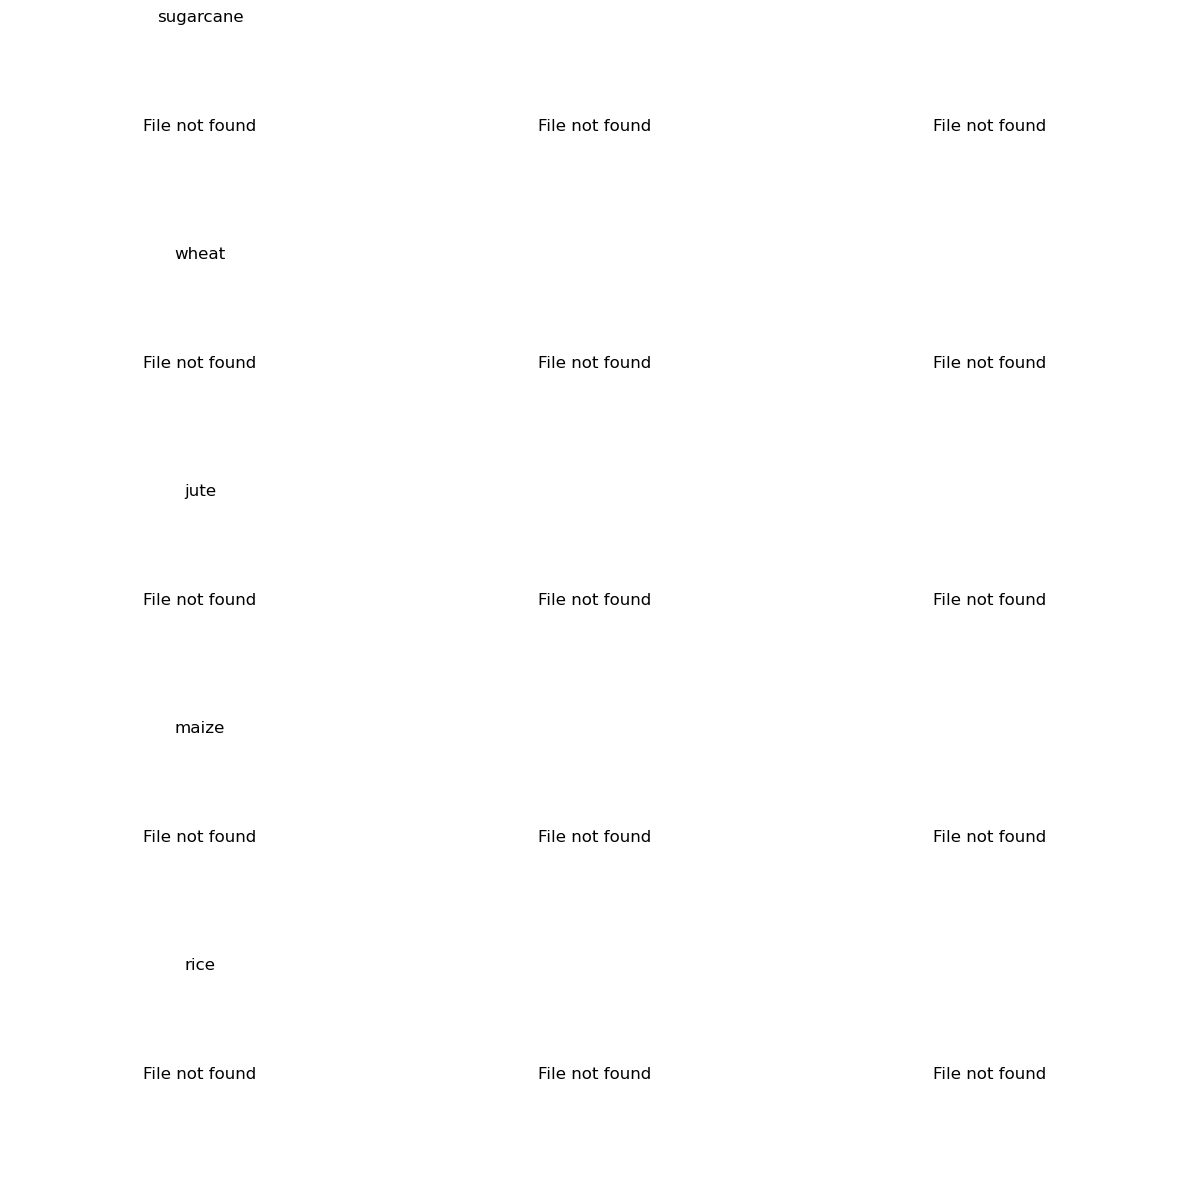

In [11]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Define the base directory where your different image folders are stored
base_dir = 'D:/computer_vision/'

# Update the paths in the DataFrame to match the local file structure
def update_path(path):
    # Normalize paths to use forward slashes
    if 'kag2' in path:
        return os.path.join(base_dir, 'kag2', os.path.basename(path)).replace('\\', '/')
    elif 'crop_image' in path:
        return os.path.join(base_dir, 'crop_image', os.path.basename(path)).replace('\\', '/')
    elif 'some_other_images' in path:
        return os.path.join(base_dir, 'some_more_images/some_other_images', os.path.basename(path)).replace('\\', '/')
    else:
        return path  # Handle any remaining cases

df['path'] = df['path'].apply(update_path)

# Check if paths were correctly updated
print(df['path'].head())

# Define a function to plot sample images, checking if each file exists
def plot_samples(df, num_samples=3):
    crops = df['crop'].unique()
    fig, axes = plt.subplots(len(crops), num_samples, figsize=(12, 12))
    for i, crop in enumerate(crops):
        sample_paths = df[df['crop'] == crop]['path'].sample(num_samples).values
        for j, img_path in enumerate(sample_paths):
            # Check if the image file exists
            if os.path.exists(img_path):
                img = Image.open(img_path)
                axes[i, j].imshow(img)
            else:
                axes[i, j].text(0.5, 0.5, 'File not found', fontsize=12, ha='center')
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(crop)
    plt.tight_layout()
    plt.show()

# Now try to plot the samples
plot_samples(df)



In [23]:
import os

# Check each path in the DataFrame
for img_path in df['path']:
    if not os.path.exists(img_path):
        print(f"Missing file: {img_path}")


Missing file: D:/computer_vision/kag2/sugarcane037ahs.jpeg
Missing file: D:/computer_vision/kag2/sugarcane034a.jpeg
Missing file: D:/computer_vision/kag2/sugarcane032arot.jpeg
Missing file: D:/computer_vision/kag2/sugarcane036ahs.jpeg
Missing file: D:/computer_vision/kag2/sugarcane023ahs.jpeg
Missing file: D:/computer_vision/kag2/sugarcane026a.jpeg
Missing file: D:/computer_vision/kag2/sugarcane0003ahs.jpeg
Missing file: D:/computer_vision/kag2/sugarcane017arot.jpeg
Missing file: D:/computer_vision/kag2/sugarcane005ahf.jpeg
Missing file: D:/computer_vision/kag2/sugarcane027arot.jpeg
Missing file: D:/computer_vision/kag2/sugarcane013ahs.jpeg
Missing file: D:/computer_vision/kag2/sugarcane014a.jpeg
Missing file: D:/computer_vision/kag2/sugarcane016ahf.jpeg
Missing file: D:/computer_vision/kag2/sugarcane028a.jpeg
Missing file: D:/computer_vision/kag2/sugarcane027ahf.jpeg
Missing file: D:/computer_vision/kag2/sugarcane016arot.jpeg
Missing file: D:/computer_vision/kag2/sugarcane019ahs.jpeg


In [25]:
# Strip any whitespace and normalize path separators
df['path'] = df['path'].str.strip().str.replace('\\', '/', regex=False)


In [27]:
print(df.head())


   Unnamed: 0                                           path       crop  \
0           0   D:/computer_vision/kag2/sugarcane037ahs.jpeg  sugarcane   
1           1     D:/computer_vision/kag2/sugarcane034a.jpeg  sugarcane   
2           2  D:/computer_vision/kag2/sugarcane032arot.jpeg  sugarcane   
3           3   D:/computer_vision/kag2/sugarcane036ahs.jpeg  sugarcane   
4           4   D:/computer_vision/kag2/sugarcane023ahs.jpeg  sugarcane   

   croplabel  
0          3  
1          3  
2          3  
3          3  
4          3  


In [33]:
import os

# Option 1: Use double backslashes
image_dir = "D:\\computer vision\\kag2"

# Option 2: Use a raw string
# image_dir = r"D:\computer vision\kag2"

# Option 3: Use forward slashes
# image_dir = "D:/computer vision/kag2"

all_files = os.listdir(image_dir)
print(all_files)


['jute', 'maize', 'rice', 'sugarcane', 'wheat']


In [35]:
print(df)


     Unnamed: 0                                           path       crop  \
0             0   D:/computer_vision/kag2/sugarcane037ahs.jpeg  sugarcane   
1             1     D:/computer_vision/kag2/sugarcane034a.jpeg  sugarcane   
2             2  D:/computer_vision/kag2/sugarcane032arot.jpeg  sugarcane   
3             3   D:/computer_vision/kag2/sugarcane036ahs.jpeg  sugarcane   
4             4   D:/computer_vision/kag2/sugarcane023ahs.jpeg  sugarcane   
..          ...                                            ...        ...   
994         994    D:/computer_vision/crop_image/rice018a.jpeg       rice   
995         995    D:/computer_vision/crop_image/rice027a.jpeg       rice   
996         996    D:/computer_vision/crop_image/rice015a.jpeg       rice   
997         997    D:/computer_vision/crop_image/rice034a.jpeg       rice   
998         998    D:/computer_vision/crop_image/rice032a.jpeg       rice   

     croplabel  
0            3  
1            3  
2            3  
3      

In [37]:
df['path'] = df['path'].str.strip().str.replace('\\', '/', regex=False)


In [41]:
# Correct the paths in the DataFrame
df['path'] = df['path'].str.replace('D:/computer_vision/', 'D:/computer vision/', regex=False)

# Verify the changes
print(df.head())

# Check if the files now exist
missing_files = df[~df['path'].apply(os.path.exists)]
print(f"Missing files:\n{missing_files}")


   Unnamed: 0                                           path       crop  \
0           0   D:/computer vision/kag2/sugarcane037ahs.jpeg  sugarcane   
1           1     D:/computer vision/kag2/sugarcane034a.jpeg  sugarcane   
2           2  D:/computer vision/kag2/sugarcane032arot.jpeg  sugarcane   
3           3   D:/computer vision/kag2/sugarcane036ahs.jpeg  sugarcane   
4           4   D:/computer vision/kag2/sugarcane023ahs.jpeg  sugarcane   

   croplabel  
0          3  
1          3  
2          3  
3          3  
4          3  
Missing files:
     Unnamed: 0                                           path       crop  \
0             0   D:/computer vision/kag2/sugarcane037ahs.jpeg  sugarcane   
1             1     D:/computer vision/kag2/sugarcane034a.jpeg  sugarcane   
2             2  D:/computer vision/kag2/sugarcane032arot.jpeg  sugarcane   
3             3   D:/computer vision/kag2/sugarcane036ahs.jpeg  sugarcane   
4             4   D:/computer vision/kag2/sugarcane023ahs.j

In [55]:
import os

# Extract the file extensions from actual files
actual_files = []
for root, dirs, files in os.walk(image_dir):
    for file in files:
        actual_files.append(file)

# Convert list to a set for efficient lookup
actual_files_set = set(actual_files)

# Check for missing files by comparing filenames and extensions
missing_files = df[~df['filename'].isin(actual_files_set)]
print(f"Missing files (extension or name mismatch):\n{missing_files}")


Missing files (extension or name mismatch):
Empty DataFrame
Columns: [Unnamed: 0, path, crop, croplabel, filename]
Index: []


In [63]:
print(df.head())
print(df['relative_path'].head())


   Unnamed: 0                                           path       crop  \
0           0   D:/computer_vision/kag2/sugarcane037ahs.jpeg  sugarcane   
1           1     D:/computer_vision/kag2/sugarcane034a.jpeg  sugarcane   
2           2  D:/computer_vision/kag2/sugarcane032arot.jpeg  sugarcane   
3           3   D:/computer_vision/kag2/sugarcane036ahs.jpeg  sugarcane   
4           4   D:/computer_vision/kag2/sugarcane023ahs.jpeg  sugarcane   

   croplabel               filename  \
0          3   sugarcane037ahs.jpeg   
1          3     sugarcane034a.jpeg   
2          3  sugarcane032arot.jpeg   
3          3   sugarcane036ahs.jpeg   
4          3   sugarcane023ahs.jpeg   

                                 normalized_path  \
0   D:\computer_vision\kag2\sugarcane037ahs.jpeg   
1     D:\computer_vision\kag2\sugarcane034a.jpeg   
2  D:\computer_vision\kag2\sugarcane032arot.jpeg   
3   D:\computer_vision\kag2\sugarcane036ahs.jpeg   
4   D:\computer_vision\kag2\sugarcane023ahs.jpeg   

 

In [79]:
import pandas as pd
import os

# Load your CSV file
csv_file_path = 'D:/computer vision/Crop_details.csv'  # Update this to your actual CSV file path
df = pd.read_csv(csv_file_path)

# Define the base directory for the images
base_dir = 'D:/computer vision/kag2'

# Create a new column for full image paths
df['full_path'] = df['path'].apply(lambda x: os.path.join(base_dir, x.split('/')[-2], x.split('/')[-1]))

# Check for missing files
df['file_exists'] = df['full_path'].apply(lambda x: os.path.isfile(x))

# Separate rows where files are missing
missing_files = df[df['file_exists'] == False]

# Print the DataFrame and missing files
print(df)
if not missing_files.empty:
    print("Missing files:")
    print(missing_files[['Unnamed: 0', 'full_path', 'crop', 'croplabel']])
else:
    print("All files are found.")


     Unnamed: 0                                               path       crop  \
0             0  /kaggle/input/kag2/sugarcane/sugarcane037ahs.jpeg  sugarcane   
1             1    /kaggle/input/kag2/sugarcane/sugarcane034a.jpeg  sugarcane   
2             2  /kaggle/input/kag2/sugarcane/sugarcane032arot....  sugarcane   
3             3  /kaggle/input/kag2/sugarcane/sugarcane036ahs.jpeg  sugarcane   
4             4  /kaggle/input/kag2/sugarcane/sugarcane023ahs.jpeg  sugarcane   
..          ...                                                ...        ...   
994         994       /kaggle/input/crop_images/rice/rice018a.jpeg       rice   
995         995       /kaggle/input/crop_images/rice/rice027a.jpeg       rice   
996         996       /kaggle/input/crop_images/rice/rice015a.jpeg       rice   
997         997       /kaggle/input/crop_images/rice/rice034a.jpeg       rice   
998         998       /kaggle/input/crop_images/rice/rice032a.jpeg       rice   

     croplabel             

In [81]:
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [83]:
df = pd.read_csv('D:/computer vision/Crop_details.csv')  # Replace with your CSV filename


In [85]:
train_df, valid_df = train_test_split(df, test_size=0.2, stratify=df['crop'], random_state=42)

In [91]:
print(df.columns)


Index(['Unnamed: 0', 'path', 'crop', 'croplabel'], dtype='object')


In [97]:
# Check the contents of the 'path' column
print(df['path'].head())


0    /kaggle/input/kag2/sugarcane/sugarcane037ahs.jpeg
1      /kaggle/input/kag2/sugarcane/sugarcane034a.jpeg
2    /kaggle/input/kag2/sugarcane/sugarcane032arot....
3    /kaggle/input/kag2/sugarcane/sugarcane036ahs.jpeg
4    /kaggle/input/kag2/sugarcane/sugarcane023ahs.jpeg
Name: path, dtype: object


In [99]:
import pandas as pd
import os

# Load your CSV file
csv_file_path = 'D:/computer vision/Crop_details.csv'  # Update this to your actual CSV file path
df = pd.read_csv(csv_file_path)

# Define the base directory for the images
base_dir = 'D:/computer vision/kag2'

# Create a new column for full image paths
df['full_path'] = df['path'].apply(lambda x: os.path.join(base_dir, x.split('/')[-2], x.split('/')[-1]))

# Check the new 'full_path' column
print(df['full_path'].head())

# Optionally check for file existence
df['file_exists'] = df['full_path'].apply(lambda x: os.path.isfile(x))
missing_files = df[df['file_exists'] == False]

if not missing_files.empty:
    print("Missing files:")
    print(missing_files[['Unnamed: 0', 'full_path', 'crop', 'croplabel']])
else:
    print("All files are found.")


0    D:/computer vision/kag2\sugarcane\sugarcane037...
1    D:/computer vision/kag2\sugarcane\sugarcane034...
2    D:/computer vision/kag2\sugarcane\sugarcane032...
3    D:/computer vision/kag2\sugarcane\sugarcane036...
4    D:/computer vision/kag2\sugarcane\sugarcane023...
Name: full_path, dtype: object
All files are found.


In [107]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [111]:
print(train_df.columns)
print(valid_df.columns)


Index(['Unnamed: 0', 'path', 'crop', 'croplabel'], dtype='object')
Index(['Unnamed: 0', 'path', 'crop', 'croplabel'], dtype='object')


In [113]:
import os

base_directory = "D:/computer vision/kag2/"  # Adjust this path if necessary

# Assuming 'path' column contains the relative paths to images
train_df['full_path'] = train_df['path'].apply(lambda x: os.path.join(base_directory, x))
valid_df['full_path'] = valid_df['path'].apply(lambda x: os.path.join(base_directory, x))


In [115]:
print(train_df.head())
print(valid_df.head())


     Unnamed: 0                                               path       crop  \
93           93    /kaggle/input/kag2/sugarcane/sugarcane008a.jpeg  sugarcane   
422         422              /kaggle/input/kag2/jute/jute024a.jpeg       jute   
828         828  /kaggle/input/crop_images/sugarcane/sugarcane0...  sugarcane   
617         617          /kaggle/input/kag2/maize/maize029ahf.jpeg      maize   
703         703            /kaggle/input/kag2/rice/rice029ahf.jpeg       rice   

     croplabel                                          full_path  
93           3  D:/kaggle/input/kag2/sugarcane/sugarcane008a.jpeg  
422          0            D:/kaggle/input/kag2/jute/jute024a.jpeg  
828          3  D:/kaggle/input/crop_images/sugarcane/sugarcan...  
617          1        D:/kaggle/input/kag2/maize/maize029ahf.jpeg  
703          2          D:/kaggle/input/kag2/rice/rice029ahf.jpeg  
     Unnamed: 0                                               path       crop  \
204         204         

In [139]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your original DataFrame
train_df, valid_df = train_test_split(df, test_size=0.2, stratify=df['crop'], random_state=42)

# Check the split
print(f"Training set: {len(train_df)} images")
print(f"Validation set: {len(valid_df)} images")


Training set: 799 images
Validation set: 200 images


In [159]:
# Training generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=None,
    x_col='full_path',
    y_col='crop',
    target_size=(224, 224),  # Change this
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid_df,
    directory=None,
    x_col='full_path',
    y_col='crop',
    target_size=(224, 224),  # Change this
    batch_size=32,
    class_mode='categorical'
)



Found 799 validated image filenames belonging to 5 classes.
Found 200 validated image filenames belonging to 5 classes.


In [161]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False  # Freeze the base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # 5 classes for your crops
])


In [163]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [165]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    epochs=20  # You can adjust this
)


D:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.3679 - loss: 1.5027 - val_accuracy: 0.6615 - val_loss: 0.8633
Epoch 2/20
 1/24 ━━━━━━━━━━━━━━━━━━━━ 16s 712ms/step - accuracy: 0.6562 - loss: 0.9369

D:\anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.6562 - loss: 0.9369 - val_accuracy: 0.7500 - val_loss: 0.8675
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7053 - loss: 0.7447 - val_accuracy: 0.7396 - val_loss: 0.6451
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8125 - loss: 0.5318 - val_accuracy: 0.7500 - val_loss: 0.5783
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8166 - loss: 0.5108 - val_accuracy: 0.7656 - val_loss: 0.5498
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7500 - loss: 0.6212 - val_accuracy: 0.7500 - val_loss: 0.3600
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8365 - loss: 0.4424 - val_accuracy: 0.8490 - val_loss: 0.4171
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8750 - loss: 0.3865 - val_accuracy: 0.8750 - val_loss: 0.2827
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9110 - loss: 0.2964 - val_accuracy: 0.8906 - val_loss: 0.349

In [171]:


# Assuming test images are stored in 'test_crop_image' folder
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'D:/computer vision/test_crop_image',  # Path to the test dataset
    target_size=(224, 224),  # Make sure this matches the input size of your model
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important: don't shuffle test data
)



Found 0 images belonging to 0 classes.


In [173]:
valid_loss, valid_accuracy = model.evaluate(valid_generator)
print(f'Validation Accuracy: {valid_accuracy}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 670ms/step - accuracy: 0.9295 - loss: 0.1921
Validation Accuracy: 0.9399999976158142


In [175]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate model on validation set
val_preds = model.predict(valid_generator)
val_preds_classes = np.argmax(val_preds, axis=1)

# Ground truth labels
val_true_classes = valid_generator.classes

# Print classification report
print(classification_report(val_true_classes, val_preds_classes))

# Confusion matrix
cm = confusion_matrix(val_true_classes, val_preds_classes)
print(cm)


7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step 
              precision    recall  f1-score   support

           0       0.21      0.20      0.21        40
           1       0.23      0.23      0.23        40
           2       0.24      0.25      0.25        40
           3       0.15      0.15      0.15        40
           4       0.20      0.20      0.20        40

    accuracy                           0.20       200
   macro avg       0.20      0.21      0.20       200
weighted avg       0.20      0.20      0.20       200

[[ 8  7 12  7  6]
 [ 9  9  6  9  7]
 [ 7  5 10  8 10]
 [ 9  7  8  6 10]
 [ 5 12  5 10  8]]


In [177]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(train_generator, validation_data=valid_generator, epochs=20, callbacks=[early_stopping])


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9510 - loss: 0.1379 - val_accuracy: 0.9350 - val_loss: 0.1937
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9570 - loss: 0.1460 - val_accuracy: 0.9550 - val_loss: 0.1798
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9772 - loss: 0.1006 - val_accuracy: 0.9600 - val_loss: 0.1370
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9816 - loss: 0.0911 - val_accuracy: 0.9550 - val_loss: 0.1263
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9805 - loss: 0.0885 - val_accuracy: 0.9650 - val_loss: 0.1270
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9865 - loss: 0.0786 - val_accuracy: 0.9550 - val_loss: 0.1227
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9734 - loss: 0.0856 - val_accuracy: 0.9850 - val_loss: 0.0831
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9794 - loss: 0.0825 - val_accuracy: 0.9750 - val_loss:

In [211]:
model.save('crop_classifier_model.keras')


In [212]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load and preprocess the image
img_path = 'D:/computer vision/test_crop_image/sugarcane-field.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))  # Resize to (224, 224)
img_array = image.img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
pred = model.predict(img_array)
print("Predicted class:", np.argmax(pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted class: 3


In [215]:
class_names = ['jute', 'maize', 'rice', 'sugarcane', 'wheat']
predicted_label = class_names[np.argmax(pred)]
print("Predicted crop:", predicted_label)


Predicted crop: sugarcane
